In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn
import torch.optim.adam
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
import os
import plotly.express as px
import statsmodels.api as sm

train_data = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/train.csv')
oil = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/oil.csv')
stores = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/stores.csv')
holiday_event = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/holidays_events.csv')
testdata = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/test.csv')
trans = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/transactions.csv')
sample_submission = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/sample_submission.csv')


    

RANDOM_SEED = 12
time = np.arange(5*365 + 1 )

In [2]:
def plot_series(time , series , format = "-" , start = 0, end = None , label = None , color = None):
    plt.plot(time[start:end] , series[start:end] , format , label = label , color = color)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

def trend(time , slope = 0 ):
    return slope * time

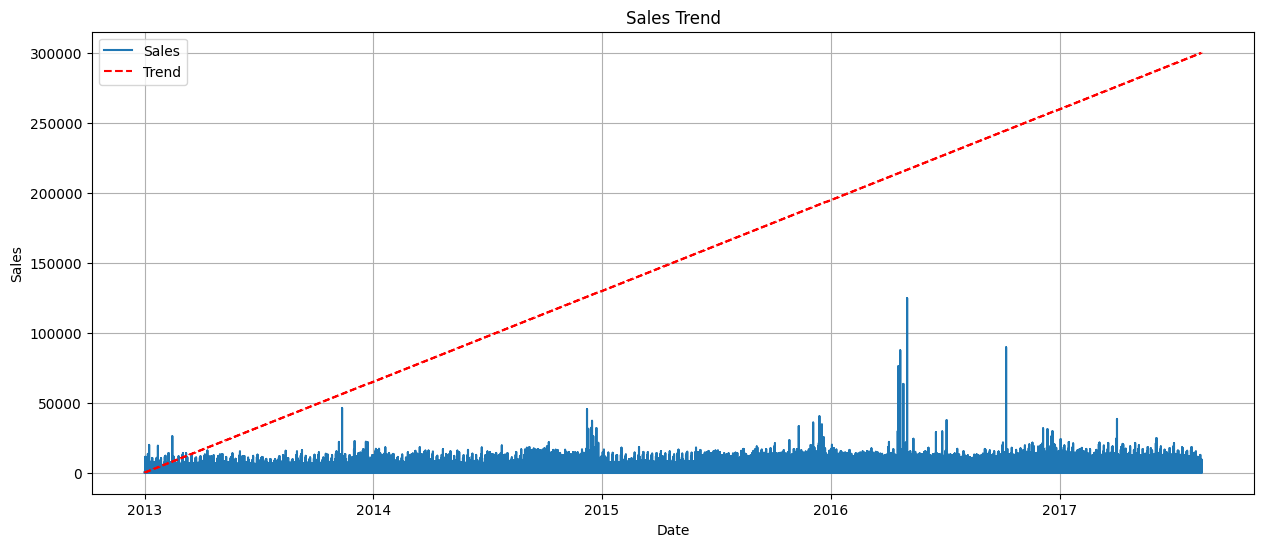

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


sales_data = pd.read_csv("csv_file\\train.csv", parse_dates=["date"])

def trend(time, slope=0):
    return slope * time


sales_data["time"] = range(len(sales_data))
slope = 0.1  
sales_data["trend"] = trend(sales_data["time"], slope)

plt.figure(figsize=(15, 6))
plt.plot(sales_data["date"], sales_data["sales"], label="Sales")
plt.plot(sales_data["date"], sales_data["trend"], label="Trend", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend")
plt.legend()
plt.grid(True)
plt.show()


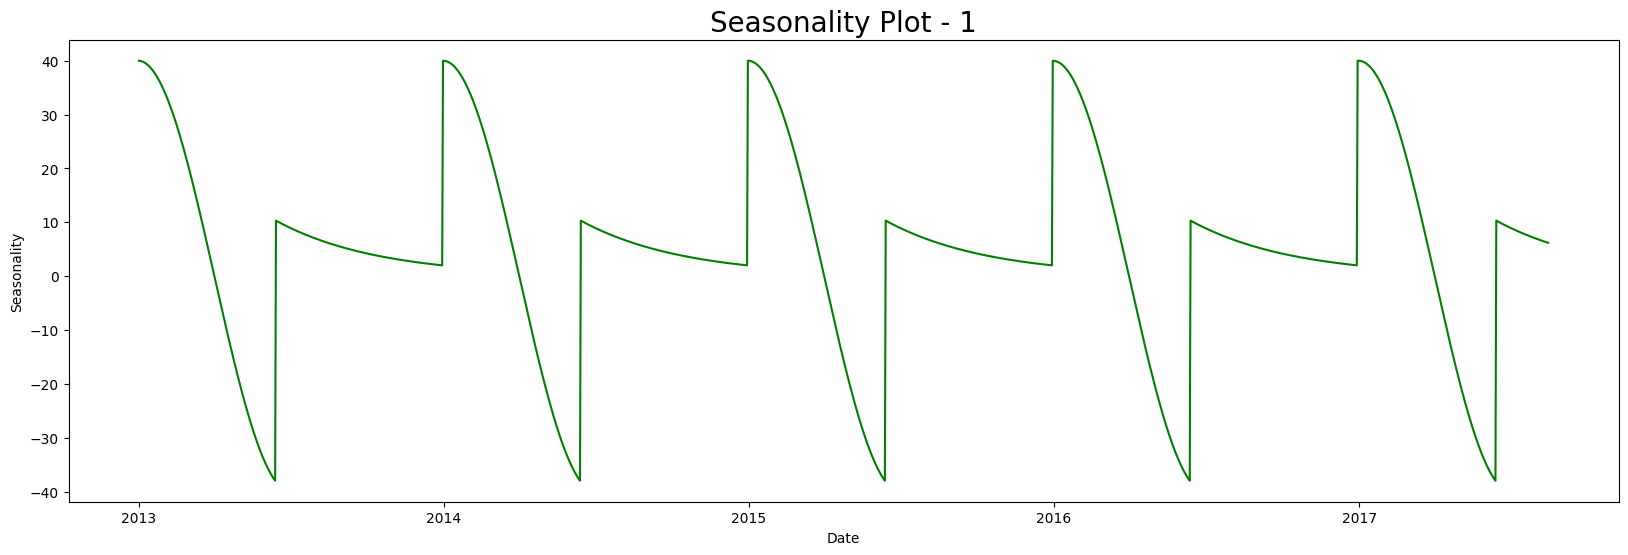

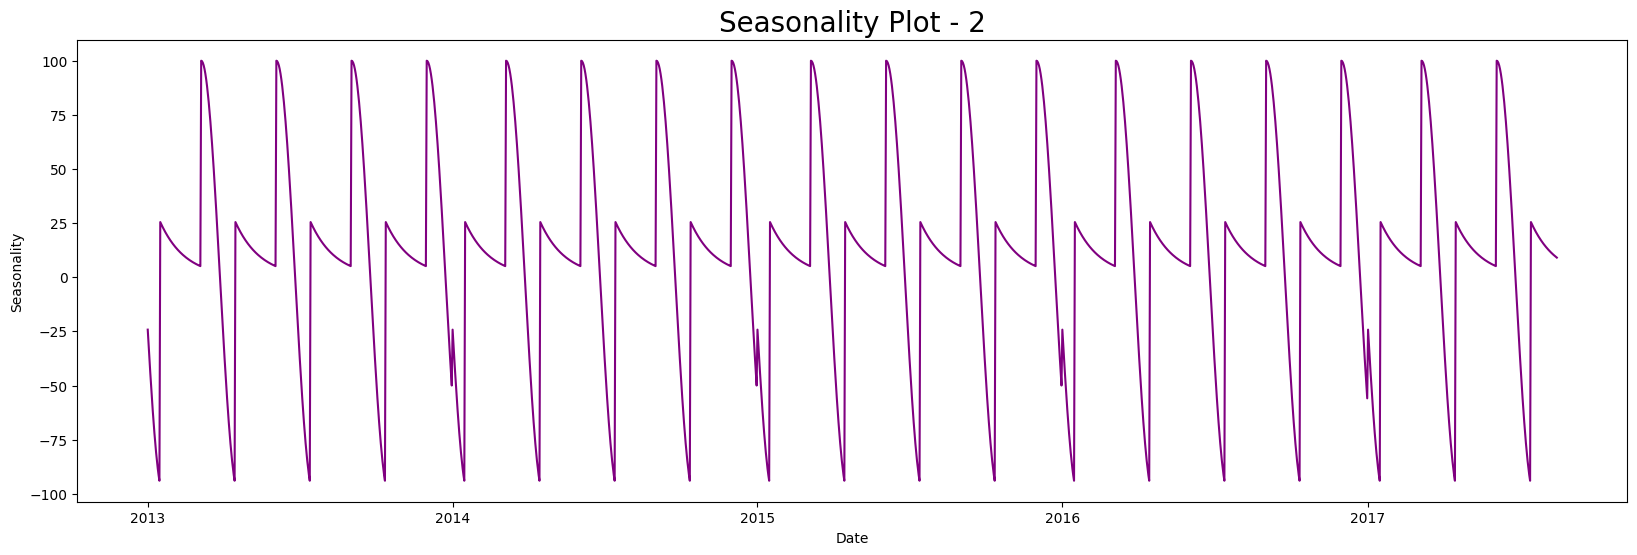

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = sales_data["date"].min()
end_date = sales_data["date"].max()
time_axis = pd.date_range(start=start_date, end=end_date, freq='D')


def seasonal_pattern(season_time):
    return np.where(season_time < 0.45,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))


def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time.dt.dayofyear + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)


time_series = pd.Series(time_axis)

amplitude = 40
series = seasonality(time_series, period=365, amplitude=amplitude, phase=0)
plt.figure(figsize=(20, 6))
plt.plot(time_axis, series, color="green")
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.title("Seasonality Plot - 1", fontdict={'fontsize': 20})
plt.show()

amplitude = 100
series = seasonality(time_series, period=90, amplitude=amplitude, phase=25)
plt.figure(figsize=(20, 6))
plt.plot(time_axis, series, color="purple")
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.title("Seasonality Plot - 2", fontdict={'fontsize': 20})
plt.show()


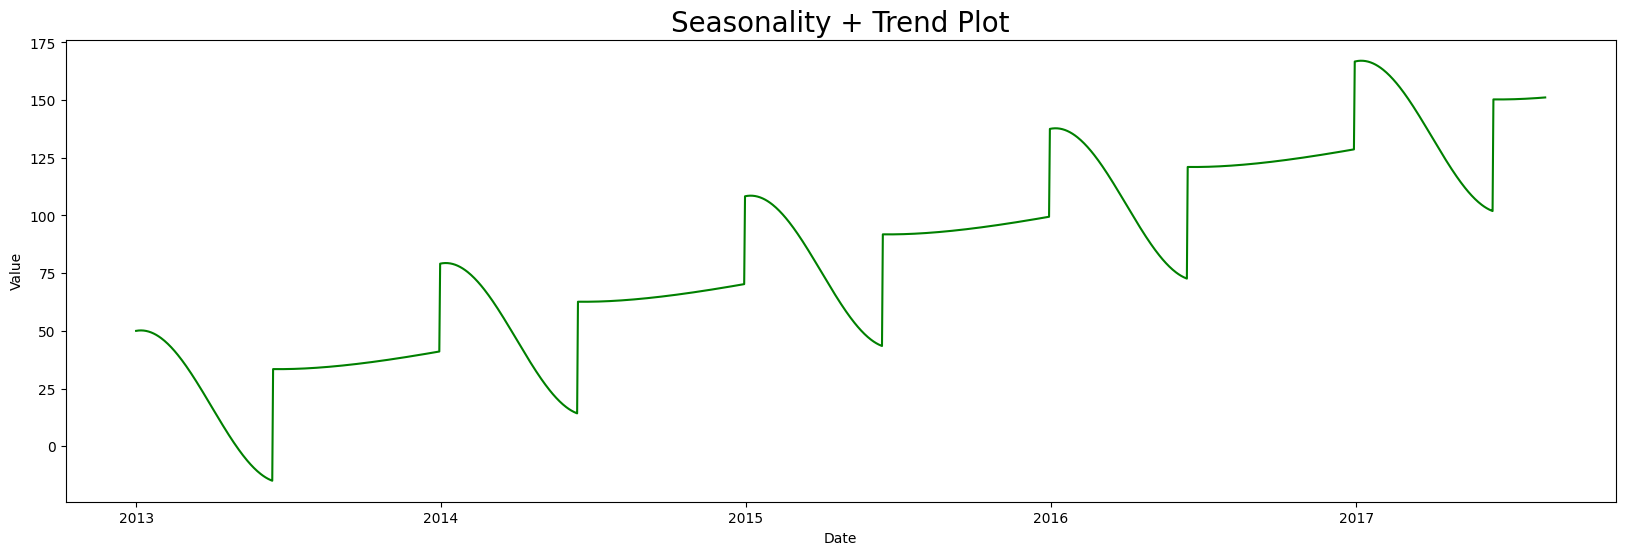

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sales_data = pd.read_csv("csv_file\\train.csv", parse_dates=["date"])


start_date = sales_data["date"].min()
end_date = sales_data["date"].max()
time_axis = pd.date_range(start=start_date, end=end_date, freq='D')


def seasonal_pattern(season_time):
    return np.where(season_time < 0.45,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))


def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time.to_series().dt.dayofyear + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)


def trend(time, slope=0):
    return slope * np.arange(len(time))


baseline = 10
slope = 0.08
amplitude = 40

trend_component = trend(time_axis, slope)

period = 365
seasonal_component = seasonality(time_axis, period=period, amplitude=amplitude, phase=0)


series = baseline + trend_component + seasonal_component


plt.figure(figsize=(20, 6))
plt.plot(time_axis, series, color="green")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Seasonality + Trend Plot", fontdict={'fontsize': 20})
plt.show()


C:\Users\Plaksha\AppData\Local\Temp\ipykernel_28796\762156635.py:23: RuntimeWarning: divide by zero encountered in divide
  periods_sales = 1 / freqs_sales


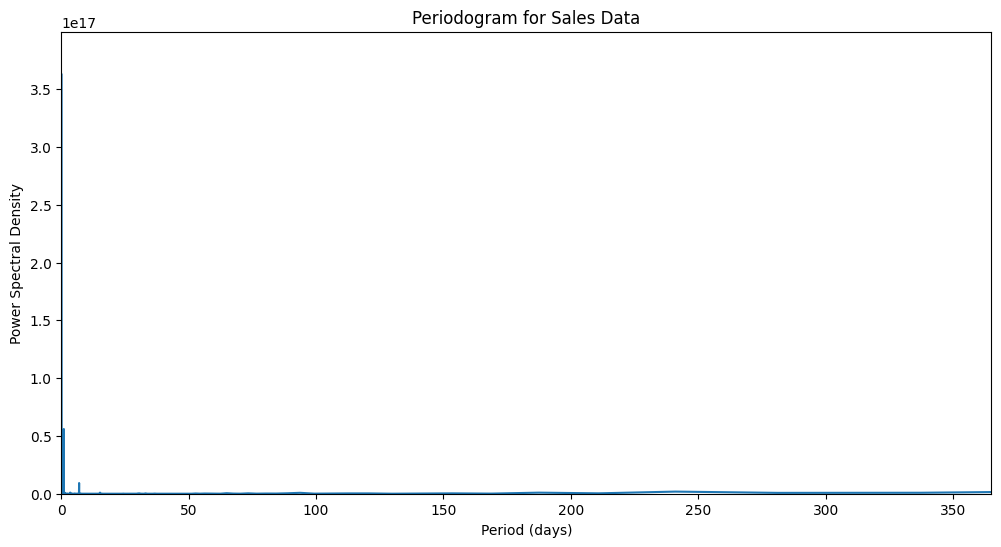

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if len(train_data) < 2:
    raise ValueError("Insufficient data points in the sales data.")

time_diff = train_data["date"].diff().dt.days
time_interval = time_diff.mean()


if pd.isnull(time_interval) or time_interval == 0:
    raise ValueError("Invalid time interval calculated.")

psd_sales = np.abs(np.fft.fft(train_data["sales"])) ** 2
freqs_sales = np.fft.fftfreq(len(psd_sales), d=time_interval)
periods_sales = 1 / freqs_sales

positive_freqs_sales = freqs_sales > 0
positive_periods_sales = periods_sales[positive_freqs_sales]
positive_psd_sales = psd_sales[positive_freqs_sales]

plt.figure(figsize=(12, 6))
plt.plot(positive_periods_sales, positive_psd_sales)
plt.title('Periodogram for Sales Data')
plt.xlabel('Period (days)')
plt.ylabel('Power Spectral Density')
plt.xlim(0, 365)  
plt.ylim(0, np.max(positive_psd_sales) * 1.1)  
plt.show()


In [7]:
import sys
!{sys.executable} -m pip install --upgrade nbformat>=4.2.0





In [8]:
train_data = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/train.csv')
oil = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/oil.csv')
stores = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/stores.csv')
holiday_event = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/holidays_events.csv')
testdata = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/test.csv')
trans = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/transactions.csv')
sample_submission = pd.read_csv('C:/Users/Plaksha/OneDrive/Documents/MLPR_project/py_file - Copy/csv_file/sample_submission.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1218 non-null   object 
 1   Prices  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


<Axes: xlabel='date'>

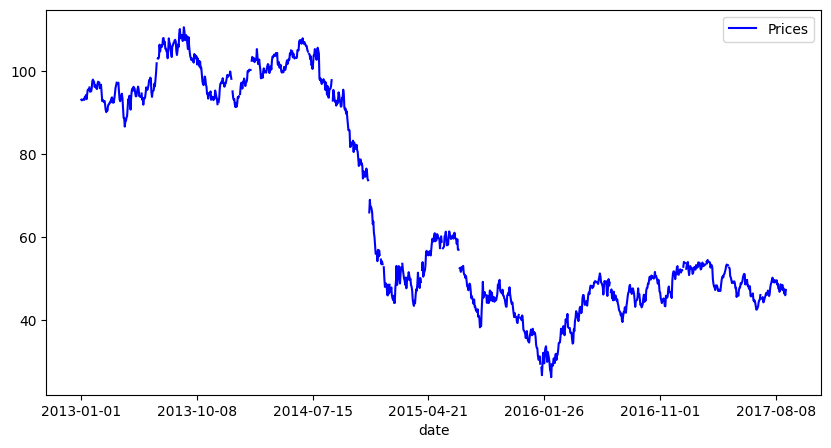

In [9]:
oil1=oil.rename(columns={"dcoilwtico":"Prices"})
oil1.info() 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
oil1.plot.line(x="date", y="Prices", color="b", ax=axes, rot=0)

In [11]:
holiday_event.loc[holiday_event.type=="Transfer", "description"] = holiday_event.loc[holiday_event.type == "Transfer", "description"].str.replace("Translado", "") 
holiday_event['type'].replace("Transfer", "Normal", inplace = True)
holiday_event.describe

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_28796\4173888584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  holiday_event['type'].replace("Transfer", "Normal", inplace = True)


<bound method NDFrame.describe of            date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                           

In [12]:
def conv_date(df):
   df['date']=pd.to_datetime(df['date'], format = "%Y-%m-%d")

conv_date(holiday_event)
conv_date(oil1)
conv_date(train_data)
conv_date(testdata)
conv_date(trans)

In [13]:
new_train = train_data.merge(holiday_event, on = 'date', how = 'left')
new_train = new_train.merge(oil1, on = 'date', how = 'left')
new_train = new_train.merge(stores, on = 'store_nbr', how = 'left')
new_train = new_train.merge(trans, on = ['date', 'store_nbr'], how = 'left')

([<matplotlib.patches.Wedge at 0x13531dea810>,
 [Text(-1.0528190116173233, 0.31870382610995246, 'GROCERY I'),
  Text(0.23883170761159428, -1.0737594774619361, 'BEVERAGES'),
  Text(1.0956847184074774, -0.09733960061725826, 'PRODUCE'),
  Text(0.8198284630823534, 0.7334039072162261, 'CLEANING'),
  Text(0.2610110629931384, 1.0685846831183723, 'DAIRY')],
 [Text(-0.5742649154276308, 0.1738384506054286, '40.6%'),
  Text(0.13027184051541504, -0.5856869877065106, '25.7%'),
  Text(0.5976462100404422, -0.053094327609413586, '14.5%'),
  Text(0.4471791616812836, 0.40003849484521414, '11.5%'),
  Text(0.14236967072353005, 0.5828643726100212, '7.6%')])

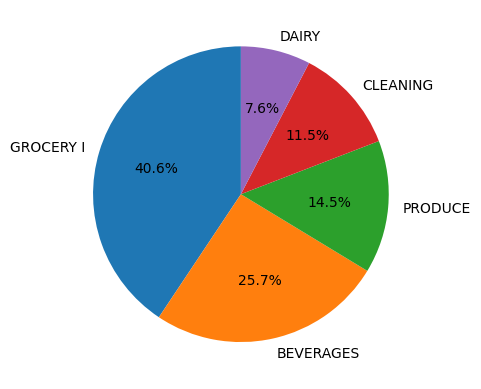

In [14]:
familysales=new_train.groupby('family')['sales'].sum()
family_sales_sorted=familysales.sort_values(ascending=False)
top_families = family_sales_sorted.head(5)
plt.pie(top_families, labels=top_families.index, autopct='%1.1f%%', startangle=90)

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_28796\2974635435.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_train["Prices"] = new_train["Prices"].fillna(method = 'bfill')


id       date  store_nbr      family  sales  onpromotion   type_x  \
561  561 2013-01-01         25  AUTOMOTIVE    0.0            0  Holiday   
562  562 2013-01-01         25   BABY CARE    0.0            0  Holiday   
563  563 2013-01-01         25      BEAUTY    2.0            0  Holiday   
564  564 2013-01-01         25   BEVERAGES  810.0            0  Holiday   
565  565 2013-01-01         25       BOOKS    0.0            0  Holiday   

       locale locale_name         description transferred  Prices     city  \
561  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
562  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
563  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
564  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
565  National     Ecuador  Primer dia del ano       False   93.14  Salinas   

           state type_y  cluster  transactions  
561  Santa Elena      D        1         770.0  
562  Santa Elena      D        1         770.0  
563  Santa Elena      D        1         770.0  
564  Santa Elena      D        1         770.0  
565  Santa Elena      D        1         770.0

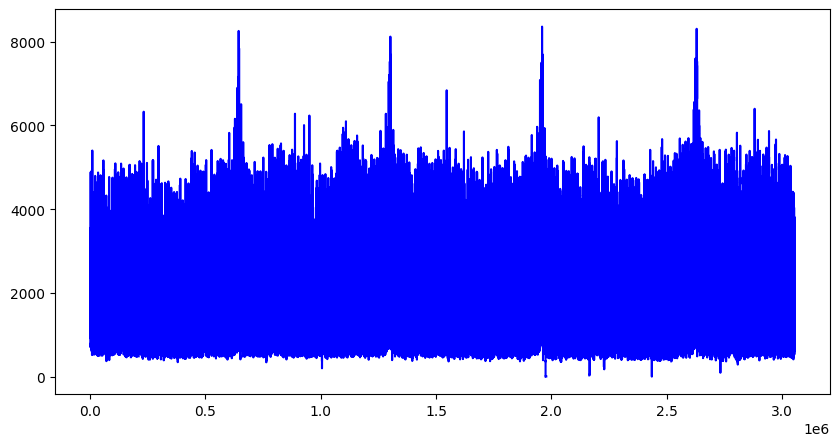

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
new_train['transactions'].plot.line(x="Date", y="Transactions", color="b", ax=axes, rot=0)
new_train["Prices"] = new_train["Prices"].fillna(method = 'bfill')
new_train = new_train[new_train["transactions"].isnull() == False]
new_train.head()

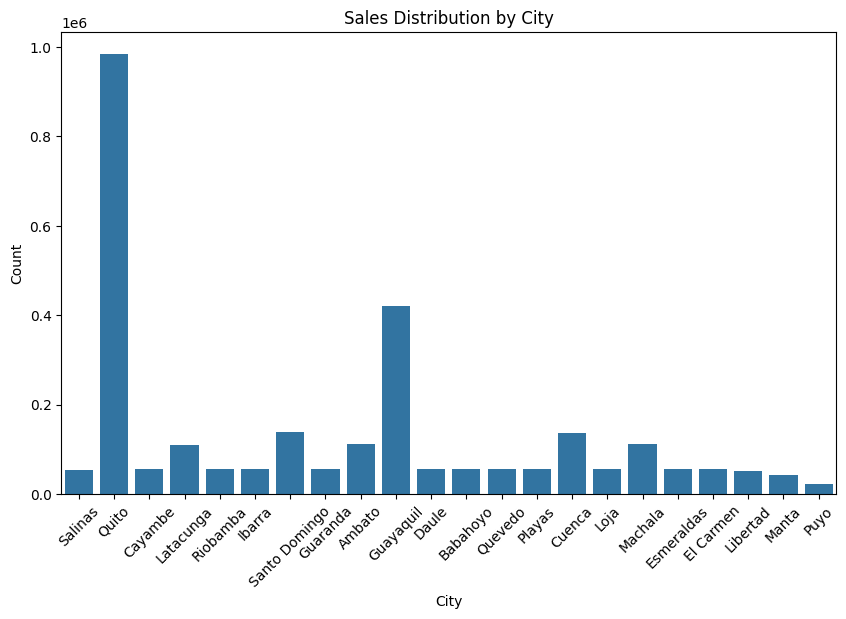

In [16]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=new_train, x='city') 
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Sales Distribution by City')
plt.xticks(rotation=45)
plt.show()

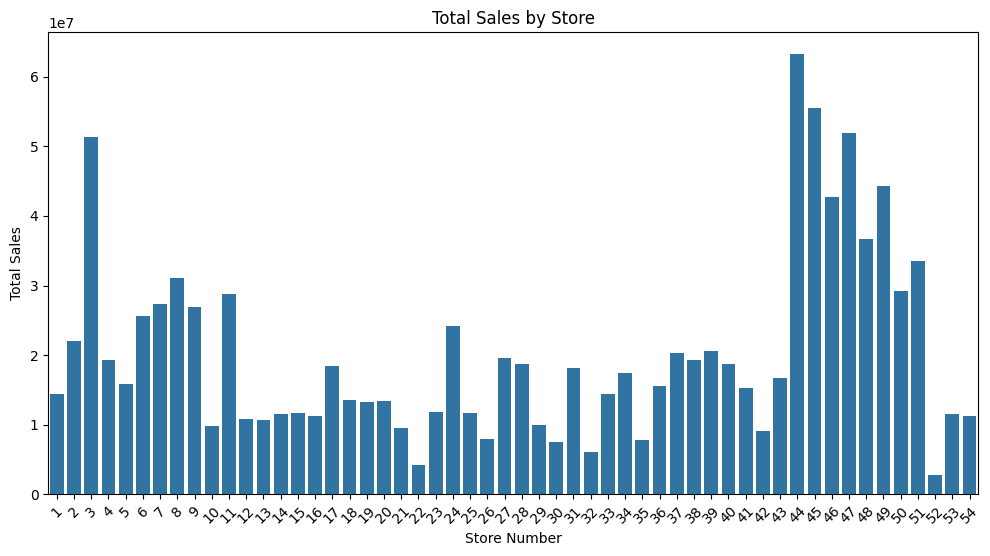

In [17]:


store_sales = new_train.groupby('store_nbr')['sales'].sum().reset_index()
store_sales = store_sales.sort_values('sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='store_nbr', y='sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=45)
plt.show()

In [18]:
new_train=new_train.rename(columns={'type_x':"holiday_type",'type_y':'store_type'})
new_train['holiday_type'] = new_train['holiday_type'].replace({np.nan : "Normal"})

new_train.head()

id       date  store_nbr      family  sales  onpromotion holiday_type  \
561  561 2013-01-01         25  AUTOMOTIVE    0.0            0      Holiday   
562  562 2013-01-01         25   BABY CARE    0.0            0      Holiday   
563  563 2013-01-01         25      BEAUTY    2.0            0      Holiday   
564  564 2013-01-01         25   BEVERAGES  810.0            0      Holiday   
565  565 2013-01-01         25       BOOKS    0.0            0      Holiday   

       locale locale_name         description transferred  Prices     city  \
561  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
562  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
563  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
564  National     Ecuador  Primer dia del ano       False   93.14  Salinas   
565  National     Ecuador  Primer dia del ano       False   93.14  Salinas   

           state store_type  cluster  transactions  
561  Santa Elena          D        1         770.0  
562  Santa Elena          D        1         770.0  
563  Santa Elena          D        1         770.0  
564  Santa Elena          D        1         770.0  
565  Santa Elena          D        1         770.0

In [19]:
new_train=new_train.drop(['locale_name','description','transferred'],axis=1)
new_train=new_train.drop(['locale','family','city','state','cluster','store_type'],axis=1)

new_train.head()

id       date  store_nbr  sales  onpromotion holiday_type  Prices  \
561  561 2013-01-01         25    0.0            0      Holiday   93.14   
562  562 2013-01-01         25    0.0            0      Holiday   93.14   
563  563 2013-01-01         25    2.0            0      Holiday   93.14   
564  564 2013-01-01         25  810.0            0      Holiday   93.14   
565  565 2013-01-01         25    0.0            0      Holiday   93.14   

     transactions  
561         770.0  
562         770.0  
563         770.0  
564         770.0  
565         770.0

In [20]:
new_train.isnull().sum() 
new_train['holiday_type'].unique()

array(['Holiday', 'Normal', 'Work Day', 'Additional', 'Event', 'Bridge'],
      dtype=object)

In [21]:

from sklearn.preprocessing import OneHotEncoder
column = ["holiday_type"] 
object2 = OneHotEncoder(handle_unknown = "ignore", sparse_output = False) 
low_card_df = pd.DataFrame(object2.fit_transform(new_train[column]))
low_card_df.index = new_train.index 
df_encoded = pd.concat([new_train.drop(column, axis = 1), low_card_df], axis=1)
df_encoded.head()

id       date  store_nbr  sales  onpromotion  Prices  transactions    0  \
561  561 2013-01-01         25    0.0            0   93.14         770.0  0.0   
562  562 2013-01-01         25    0.0            0   93.14         770.0  0.0   
563  563 2013-01-01         25    2.0            0   93.14         770.0  0.0   
564  564 2013-01-01         25  810.0            0   93.14         770.0  0.0   
565  565 2013-01-01         25    0.0            0   93.14         770.0  0.0   

       1    2    3    4    5  
561  0.0  0.0  1.0  0.0  0.0  
562  0.0  0.0  1.0  0.0  0.0  
563  0.0  0.0  1.0  0.0  0.0  
564  0.0  0.0  1.0  0.0  0.0  
565  0.0  0.0  1.0  0.0  0.0

In [22]:
temp = pd.merge(new_train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), trans, how = "left")
print("Spearman Correlation between Total Sales and Transactions: {:,.4f}".format(temp.corr("spearman").sales.loc["transactions"]))
px.line(trans.sort_values(["store_nbr", "date"]), x='date', y='transactions', color='store_nbr',title = "Transactions" )

Spearman Correlation between Total Sales and Transactions: 0.8095


In [23]:
a = trans.copy()
a["year"] = a.date.dt.year
a["month"] = a.date.dt.month
px.box(a, x="year", y="transactions" , color = "month", title = "Transactions")


In [24]:
a = trans.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()
px.line(a, x="dayofweek", y="transactions" , color = "year", title = "Transactions")